#Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Import data

##Get CSVs from google drive

In [3]:
path_chromecast = "/content/drive/MyDrive/UFRJ/2022.2/Probest/dataset_chromecast.csv"
path_smart_tv = "/content/drive/MyDrive/UFRJ/2022.2/Probest/dataset_smart-tv.csv"

In [4]:
df_chromecast = pd.read_csv(path_chromecast)
df_smart_tv = pd.read_csv(path_smart_tv)

In [5]:
df_chromecast.head()

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918
1,66161985,2021-09-06 00:02:00,685.935484,328.258065
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516
3,66161985,2021-09-06 00:04:00,776.133333,229.200000
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000


In [6]:
print(len(df_chromecast))
print(len(df_smart_tv))

1620529
4417903


#1 - Data treatment

##Data to Log 10

In [7]:
df_chromecast_copy = df_chromecast.copy()

In [8]:
df_chromecast_copy["log_bytes_up"] = np.log10(df_chromecast_copy["bytes_up"]+1)
df_chromecast_copy["log_bytes_down"] = np.log10(df_chromecast_copy["bytes_down"]+1)

df_chromecast_copy["log_bytes_up"] = df_chromecast_copy["log_bytes_up"].replace(-np.inf, 0)
df_chromecast_copy["log_bytes_down"] = df_chromecast_copy["log_bytes_down"].replace(-np.inf, 0)

In [9]:
df_smart_tv_copy = df_smart_tv.copy()

In [10]:
df_smart_tv_copy["log_bytes_up"] = np.log10(df_smart_tv_copy["bytes_up"]+1)
df_smart_tv_copy["log_bytes_down"] = np.log10(df_smart_tv_copy["bytes_down"]+1)

df_smart_tv_copy["log_bytes_up"] = df_smart_tv_copy["log_bytes_up"].replace(-np.inf, 0)
df_smart_tv_copy["log_bytes_down"] = df_smart_tv_copy["log_bytes_down"].replace(-np.inf, 0)

In [11]:
df_chromecast_copy.head()

,device_id,date_hour,bytes_up,bytes_down,log_bytes_up,log_bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918,3.475383,4.691848
1,66161985,2021-09-06 00:02:00,685.935484,328.258065,2.836916,2.517536
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516,3.652720,4.578812
3,66161985,2021-09-06 00:04:00,776.133333,229.200000,2.890496,2.362105
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000,3.488877,4.713136


#2 - General Statistics

##Functions

###Calculate Bin Size

In [12]:
def calculate_binSize(data):
  binSize = int(1 + 3.322 * np.log10(len(data)))
  return binSize

###Histogram

####Upload

In [13]:
def histogram_upload(df, dataSetName):
  fig = plt.figure(figsize = (10,5))
  plt.hist(
      df["log_bytes_up"],
      bins=calculate_binSize(df["log_bytes_up"]),
      color="blue",
      alpha=0.5,
      edgecolor="black",
  )
  plt.xlabel("Upload")
  plt.ylabel("Frequency")
  plt.title("Histogram Upload - " + dataSetName)

####Download

In [14]:
def histogram_download(df, dataSetName):
  fig = plt.figure(figsize = (10,5))
  plt.hist(
      df["log_bytes_down"],
      bins=calculate_binSize(df["log_bytes_down"]),
      color="blue",
      alpha=0.5,
      edgecolor="black",
  )
  plt.xlabel("Download")
  plt.ylabel("Frequency")
  plt.title("Histogram Download - " + dataSetName)

###Empirical Distribution Function

In [15]:
from statsmodels.distributions.empirical_distribution import ECDF

####Upload

In [132]:
def ecdf_upload(df, dataSetName):
  fig = plt.figure(figsize = (10,5))
  
  ecdf = ECDF(df['log_bytes_up'])

  plt.plot(ecdf.x, ecdf.y)
  plt.xlabel("Upload")
  plt.ylabel("F(x)")
  plt.title("EDC Upload - " + dataSetName)

####Download

In [131]:
def ecdf_download(df, dataSetName):
  fig = plt.figure(figsize = (10,5))
  
  ecdf = ECDF(df['log_bytes_down'])

  plt.plot(ecdf.x, ecdf.y)
  plt.xlabel("Download")
  plt.ylabel("F(x)")
  plt.title("EDC Download - " + dataSetName)

###Box Plot

In [144]:
def boxPlot(df, dataSetName):
  fig = plt.figure(figsize = (5,8))

  plt.boxplot(
      [df["log_bytes_up"], df["log_bytes_down"]],
      labels=["Upload", "Download"]
  )

  plt.ylabel("Bytes")
  plt.title("Box Plot - " + dataSetName)

###Mean

####Upload

In [19]:
def mean_upload(df):
  meanUp = df['log_bytes_up'].mean()
  return meanUp

####Download

In [20]:
def mean_download(df):
  meanDown = df['log_bytes_down'].mean()
  return meanDown

###Variance

####Upload

In [21]:
def variance_upload(df):
  varUp = df['log_bytes_up'].var()
  return varUp

####Download

In [22]:
def variance_download(df):
  varDown = df['log_bytes_down'].var()
  return varDown

###Standard Deviation

####Upload

In [23]:
def standardDeviation_upload(df):
  stdUp = df['log_bytes_up'].std()
  return stdUp

####Download

In [24]:
def standardDeviation_download(df):
  stdDown = df['log_bytes_down'].std()
  return stdDown

##Chromecast

In [25]:
df_chromecast2 = df_chromecast_copy.copy()

####Bin Size

In [26]:
print("Bin Size Upload = " + str(calculate_binSize(df_chromecast2['log_bytes_up'])))

Bin Size Upload = 21


In [27]:
print("Bin Size Download = " + str(calculate_binSize(df_chromecast2['log_bytes_down'])))

Bin Size Download = 21


####Histogram

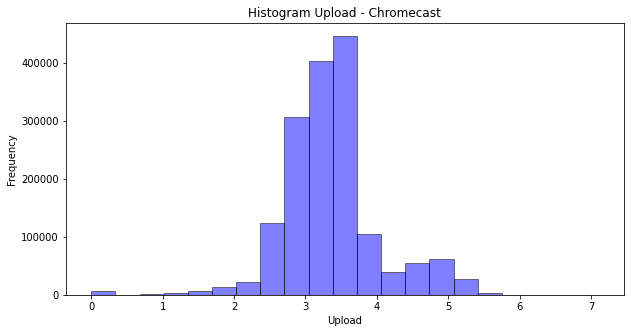

In [28]:
histogram_upload(df_chromecast2, 'Chromecast')
plt.show()

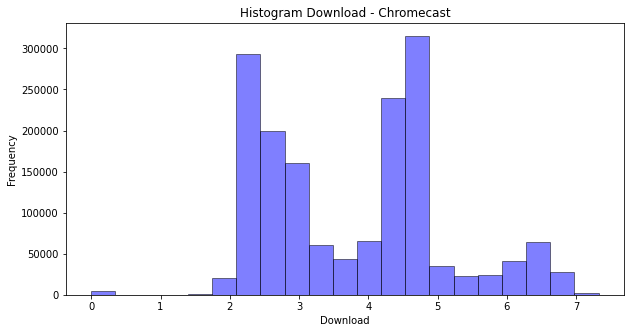

In [29]:
histogram_download(df_chromecast2, 'Chromecast')
plt.show()

####Empirical Distribution Function

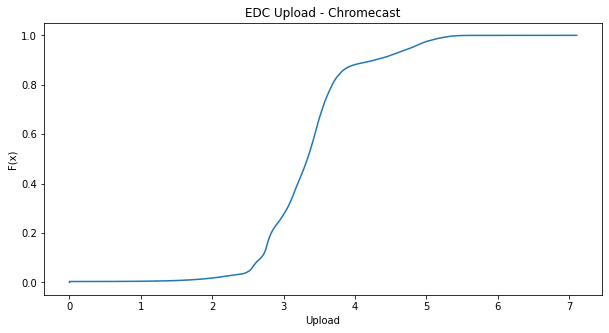

In [133]:
ecdf_upload(df_chromecast2, 'Chromecast')
plt.show()

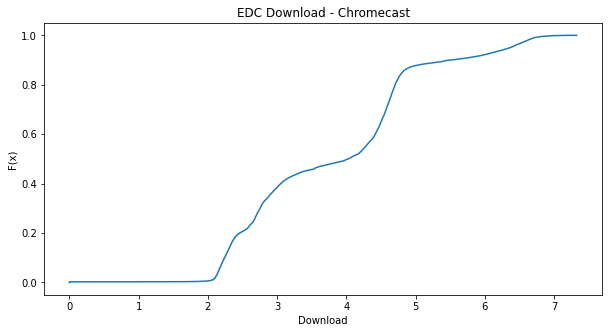

In [134]:
ecdf_download(df_chromecast2, 'Chromecast')
plt.show()

####Box Plot

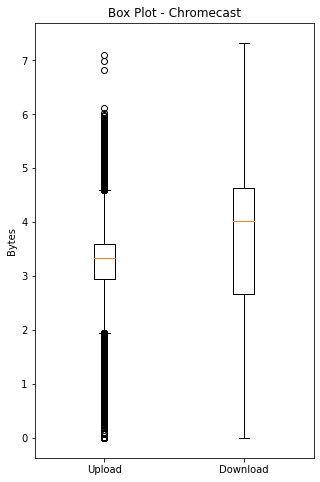

In [145]:
boxPlot(df_chromecast2, 'Chromecast')
plt.show()

####Mean, Variance and Standard Deviation

In [33]:
print( "Mean Chromecast Upload = " + str( round(mean_upload(df_chromecast2), 3) ) )
print( "Mean Chromecast Download = " + str( round(mean_download(df_chromecast2), 3) ) )

Mean Chromecast Upload = 3.35
Mean Chromecast Download = 3.8


In [34]:
print( "Variance Chromecast Upload = " + str( round(variance_upload(df_chromecast2), 3) ) )
print( "Variance Chromecast Download = " + str( round(variance_download(df_chromecast2), 3) ) )

Variance Chromecast Upload = 0.46
Variance Chromecast Download = 1.664


In [35]:
print( "Standard Deviation Chromecast Upload = " + str( round(standardDeviation_upload(df_chromecast2), 3) ) )
print( "Standard Deviation Chromecast Download = " + str( round(standardDeviation_download(df_chromecast2), 3) ) )

Standard Deviation Chromecast Upload = 0.678
Standard Deviation Chromecast Download = 1.29


In [146]:
print( "Mean Chromecast Upload = " + str( round(mean_upload(df_chromecast2), 3) ) )
print( "Mean Chromecast Download = " + str( round(mean_download(df_chromecast2), 3) ) )
print( "Variance Chromecast Upload = " + str( round(variance_upload(df_chromecast2), 3) ) )
print( "Variance Chromecast Download = " + str( round(variance_download(df_chromecast2), 3) ) )
print( "Standard Deviation Chromecast Upload = " + str( round(standardDeviation_upload(df_chromecast2), 3) ) )
print( "Standard Deviation Chromecast Download = " + str( round(standardDeviation_download(df_chromecast2), 3) ) )

Mean Chromecast Upload = 3.35
Mean Chromecast Download = 3.8
Variance Chromecast Upload = 0.46
Variance Chromecast Download = 1.664
Standard Deviation Chromecast Upload = 0.678
Standard Deviation Chromecast Download = 1.29


##Smart TV

In [36]:
df_smart_tv2 = df_smart_tv_copy.copy()

####Bin Size

In [37]:
print("Bin Size Upload = " + str(calculate_binSize(df_smart_tv2['log_bytes_up'])))

Bin Size Upload = 23


In [38]:
print("Bin Size Download = " + str(calculate_binSize(df_smart_tv2['log_bytes_down'])))

Bin Size Download = 23


####Histogram

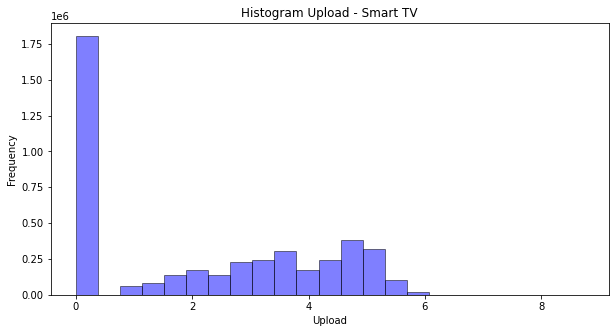

In [39]:
histogram_upload(df_smart_tv2, 'Smart TV')
plt.show()

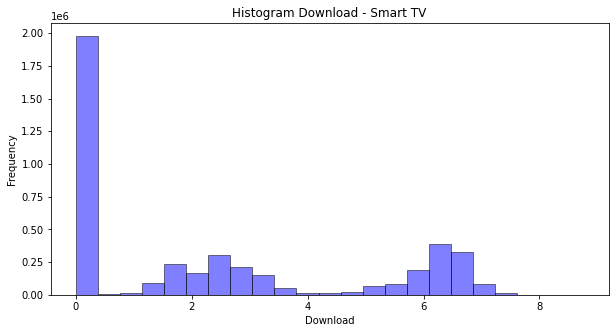

In [40]:
histogram_download(df_smart_tv2, 'Smart TV')
plt.show()

####Empirical Distribution Function

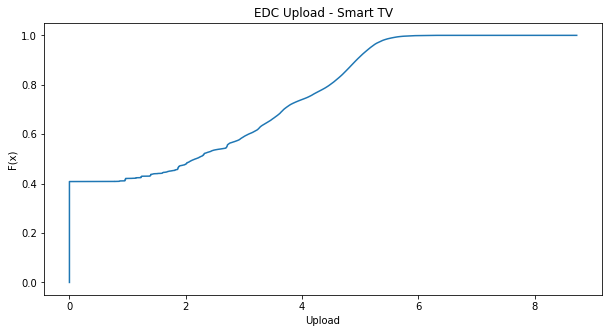

In [135]:
ecdf_upload(df_smart_tv2, 'Smart TV')
plt.show()

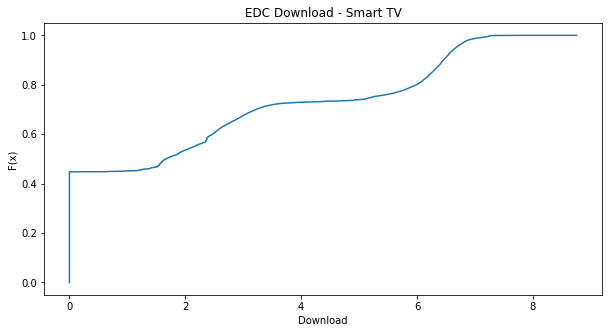

In [136]:
ecdf_download(df_smart_tv2, 'Smart TV')
plt.show()

####Box Plot

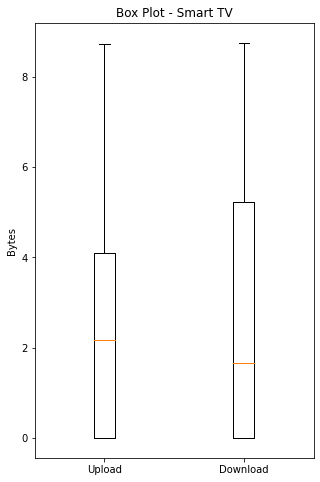

In [141]:
boxPlot(df_smart_tv2, 'Smart TV')
plt.show()

####Mean, Variance and Standard Deviation

In [44]:
print( "Mean Smart TV Upload = " + str( round(mean_upload(df_smart_tv2), 3) ) )
print( "Mean Smart TV Download = " + str( round(mean_download(df_smart_tv2), 3) ) )

Mean Smart TV Upload = 2.158
Mean Smart TV Download = 2.352


In [45]:
print( "Variance Smart TV Upload = " + str( round(variance_upload(df_smart_tv2), 3) ) )
print( "Variance Smart TV Download = " + str( round(variance_download(df_smart_tv2), 3) ) )

Variance Smart TV Upload = 4.11
Variance Smart TV Download = 6.721


In [46]:
print( "Standard Deviation Smart TV Upload = " + str( round(standardDeviation_upload(df_smart_tv2), 3) ) )
print( "Standard Deviation Smart TV Download = " + str( round(standardDeviation_download(df_smart_tv2), 3) ) )

Standard Deviation Smart TV Upload = 2.027
Standard Deviation Smart TV Download = 2.593


In [147]:
print( "Mean Smart TV Upload = " + str( round(mean_upload(df_smart_tv2), 3) ) )
print( "Mean Smart TV Download = " + str( round(mean_download(df_smart_tv2), 3) ) )
print( "Variance Smart TV Upload = " + str( round(variance_upload(df_smart_tv2), 3) ) )
print( "Variance Smart TV Download = " + str( round(variance_download(df_smart_tv2), 3) ) )
print( "Standard Deviation Smart TV Upload = " + str( round(standardDeviation_upload(df_smart_tv2), 3) ) )
print( "Standard Deviation Smart TV Download = " + str( round(standardDeviation_download(df_smart_tv2), 3) ) )

Mean Smart TV Upload = 2.158
Mean Smart TV Download = 2.352
Variance Smart TV Upload = 4.11
Variance Smart TV Download = 6.721
Standard Deviation Smart TV Upload = 2.027
Standard Deviation Smart TV Download = 2.593


#3 - Statistics by Time

##Functions

###Create Hour Column

In [47]:
def createHourColumn(df):
  df['hour'] = df['date_hour'].apply(lambda row: int(row.split(" ")[1].split(":")[0]))

###Box Plot

In [160]:
def hour_boxPlot(df, dataSetName):
  hour = 0
  for row in range (0, 12):
    fig, axs = plt.subplots(nrows = 1, ncols = 2, sharex=True, sharey=True, figsize = (10,5))
    fig.suptitle('Box Plot by Hour - ' + dataSetName)
    for column in range(0, 2):
      axs[column].boxplot( [ df[df["hour"] == hour]["log_bytes_up"], df[df["hour"] == hour]["log_bytes_down"] ], labels=["Upload", "Download"] )
      axs[column].set_title("Hour: " + str(hour))
      hour += 1

###Mean

####Upload

In [49]:
def hour_mean_upload(df, dataSetName):
  fig = plt.figure()
  plt.plot( df.groupby("hour")["log_bytes_up"].mean(), marker="." )
  
  plt.xlabel("Hour")
  plt.ylabel("Mean")

  plt.title("Mean Upload - " + dataSetName)

####Download

In [50]:
def hour_mean_download(df, dataSetName):
  fig = plt.figure()
  plt.plot( df.groupby("hour")["log_bytes_down"].mean(), marker="." )
  
  plt.xlabel("Hour")
  plt.ylabel("Mean")

  plt.title("Mean Download - " + dataSetName)

###Variance

####Upload

In [51]:
def hour_variance_upload(df, dataSetName):
  fig = plt.figure()
  plt.plot( df.groupby("hour")["log_bytes_up"].var(), marker="." )
  
  plt.xlabel("Hour")
  plt.ylabel("Variance")

  plt.title("Variance Upload - " + dataSetName)

####Download

In [52]:
def hour_variance_download(df, dataSetName):
  fig = plt.figure()
  plt.plot( df.groupby("hour")["log_bytes_down"].var(), marker="." )
  
  plt.xlabel("Hour")
  plt.ylabel("Variance")

  plt.title("Variance Download - " + dataSetName)

###Standard Deviation

####Upload

In [53]:
def hour_standardDeviation_upload(df, dataSetName):
  fig = plt.figure()
  plt.plot( df.groupby("hour")["log_bytes_up"].std(), marker="." )
  
  plt.xlabel("Hour")
  plt.ylabel("Standard Deviation")

  plt.title("Standard Deviation Upload - " + dataSetName)

####Download

In [54]:
def hour_standardDeviation_download(df, dataSetName):
  fig = plt.figure()
  plt.plot( df.groupby("hour")["log_bytes_down"].std(), marker="." )
  
  plt.xlabel("Hour")
  plt.ylabel("Standard Deviation")

  plt.title("Standard Deviation Download - " + dataSetName)

##Chromecast

In [55]:
df_chromecast3 = df_chromecast_copy.copy()

In [56]:
createHourColumn(df_chromecast3)

####Box Plot

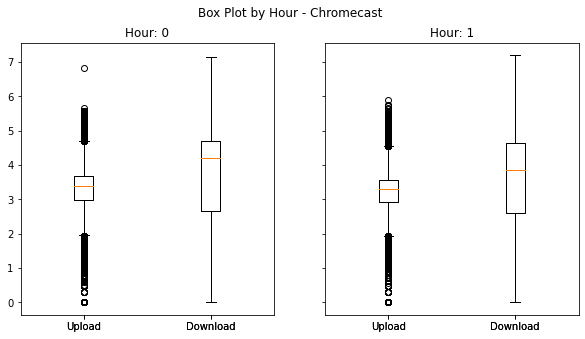

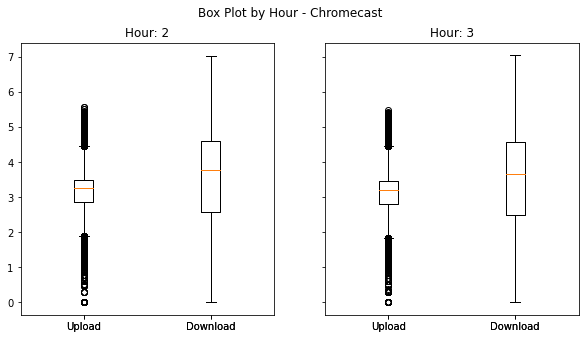

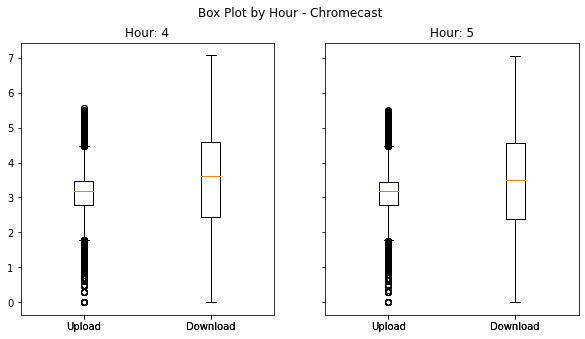

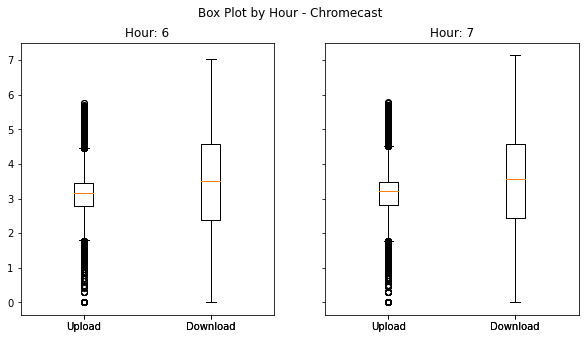

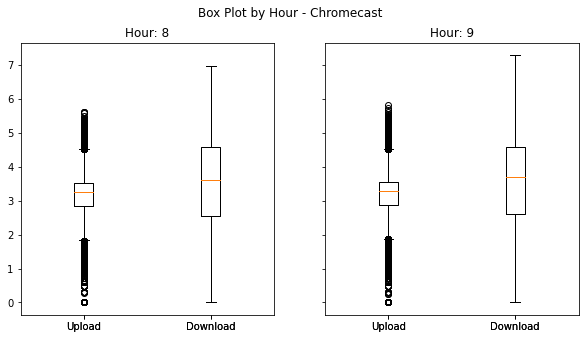

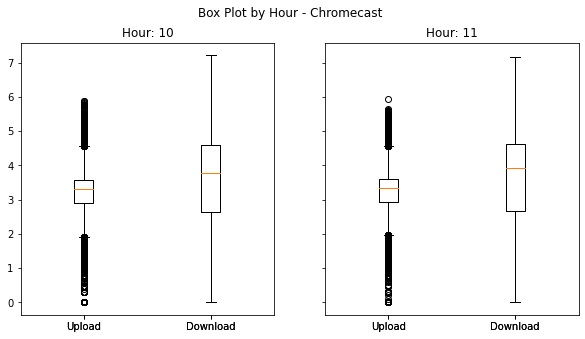

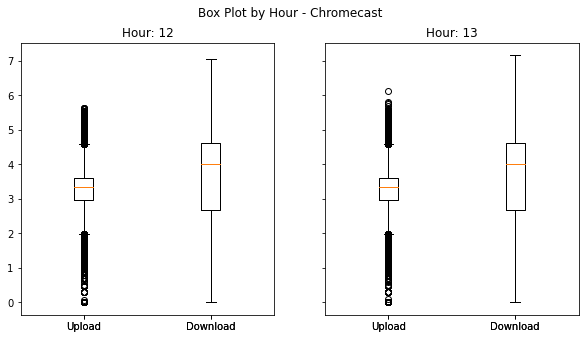

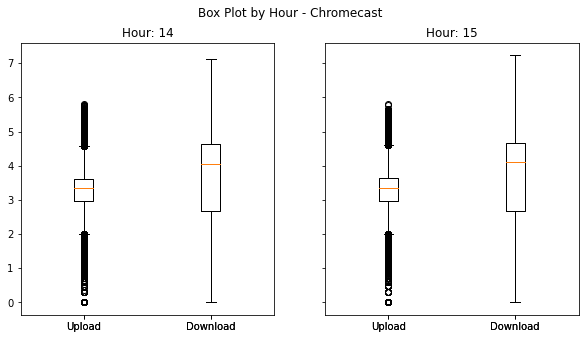

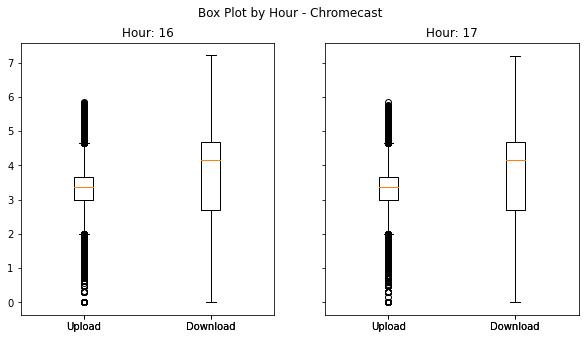

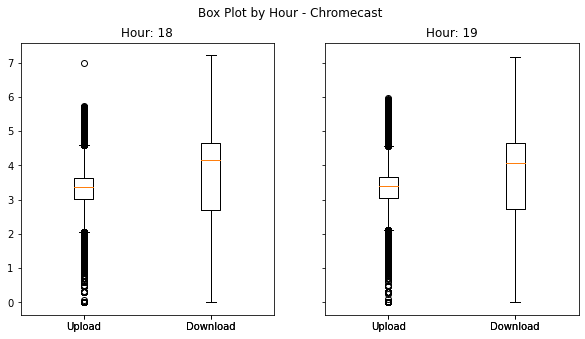

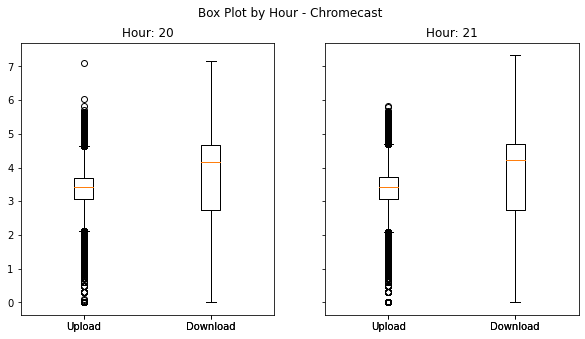

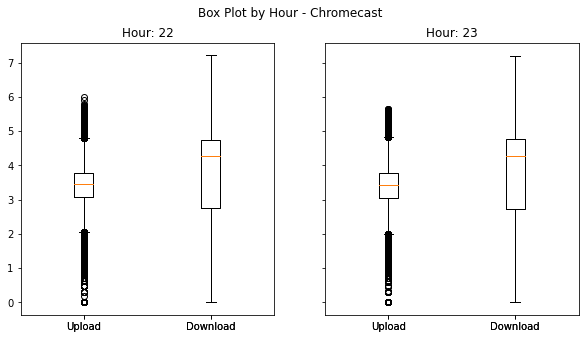

In [161]:
hour_boxPlot(df_chromecast3, "Chromecast")

####Mean

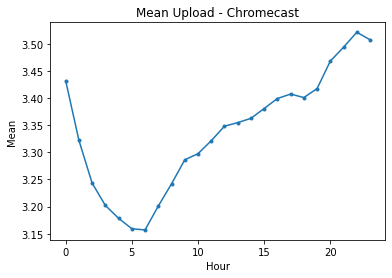

In [58]:
hour_mean_upload(df_chromecast3, "Chromecast")

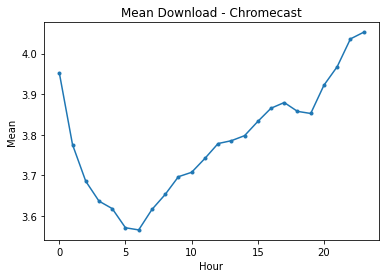

In [59]:
hour_mean_download(df_chromecast3, "Chromecast")

####Variance

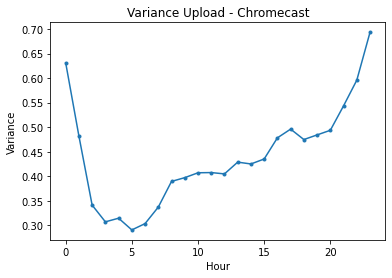

In [60]:
hour_variance_upload(df_chromecast3, "Chromecast")

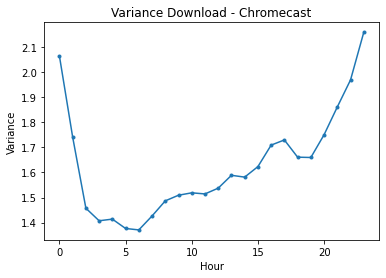

In [61]:
hour_variance_download(df_chromecast3, "Chromecast")

####Standard Deviation

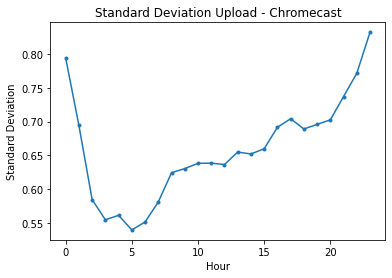

In [62]:
hour_standardDeviation_upload(df_chromecast3, "Chromecast")

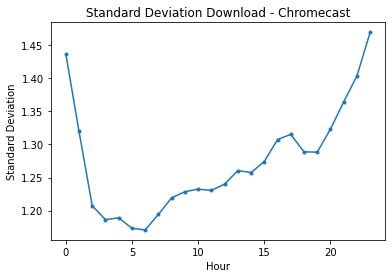

In [63]:
hour_standardDeviation_download(df_chromecast3, "Chromecast")

##Smart TV

In [64]:
df_smart_tv3 = df_smart_tv_copy.copy()

In [65]:
createHourColumn(df_smart_tv3)

####Box Plot

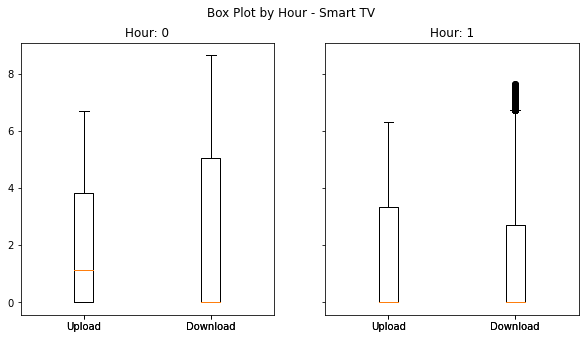

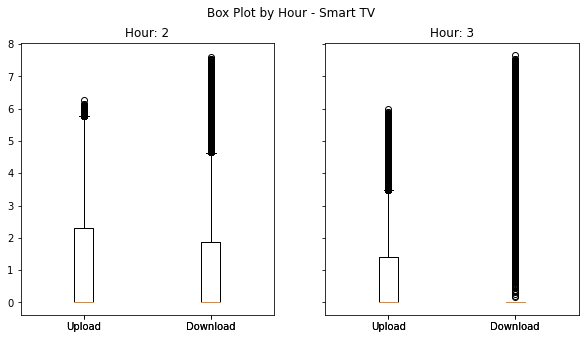

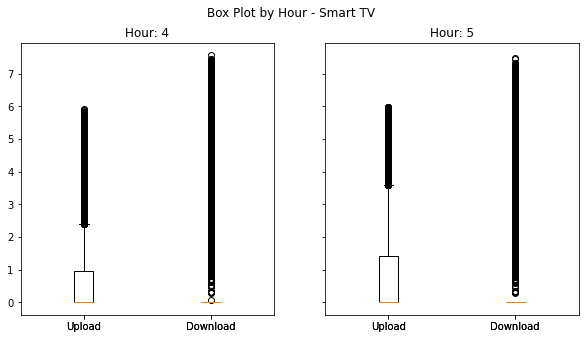

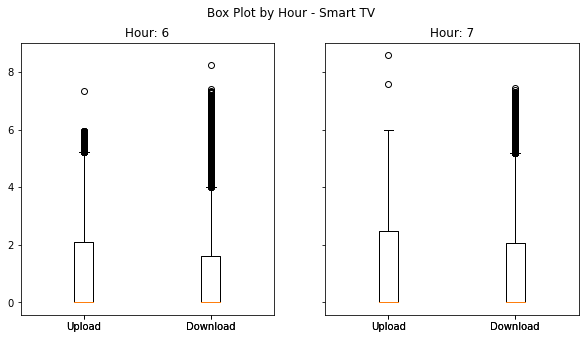

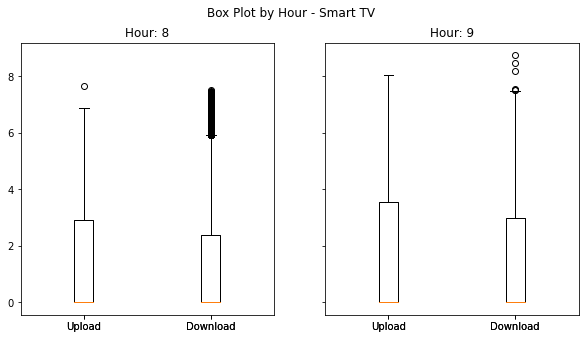

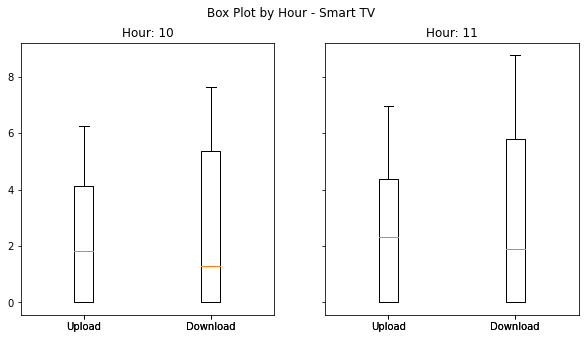

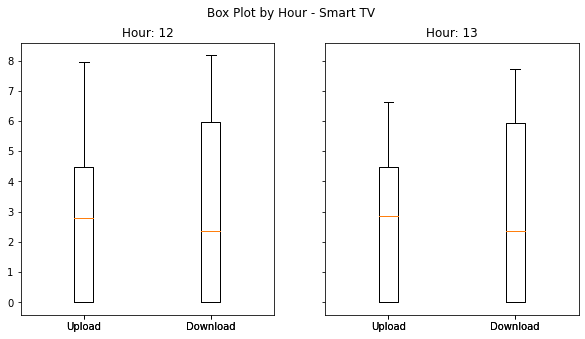

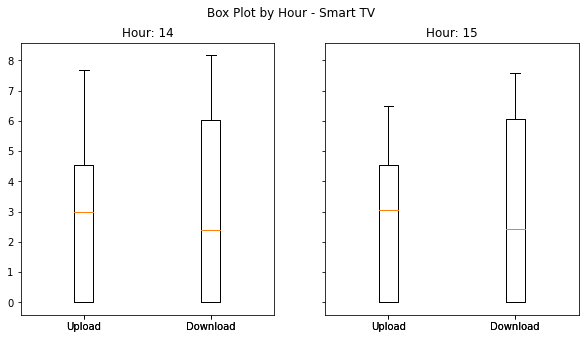

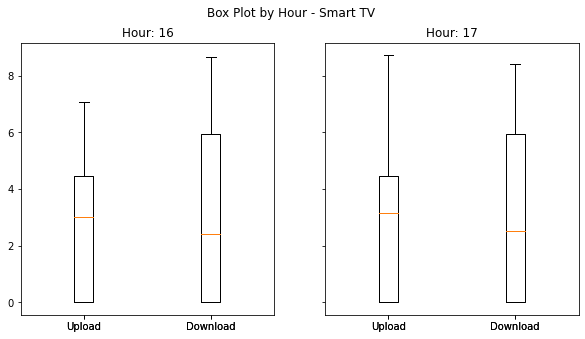

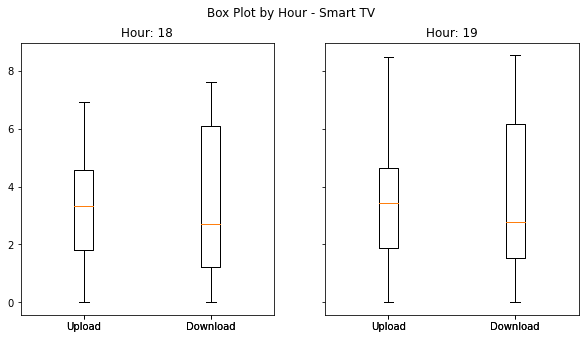

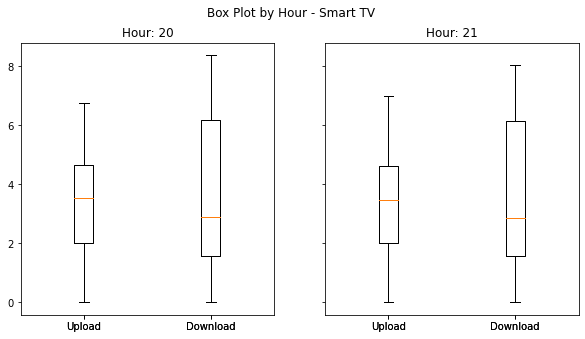

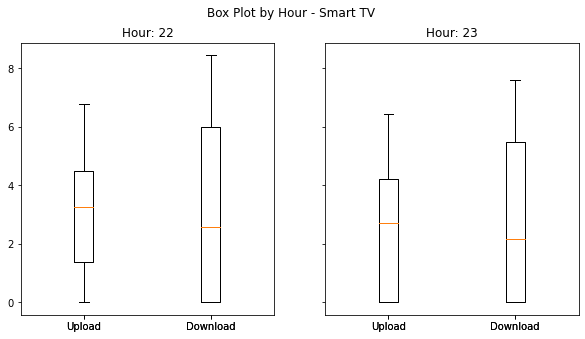

In [162]:
hour_boxPlot(df_smart_tv3, "Smart TV")

####Mean

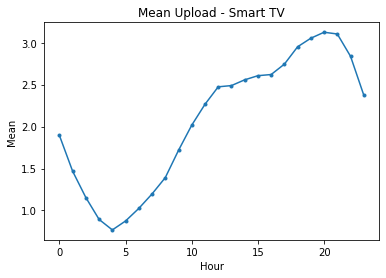

In [67]:
hour_mean_upload(df_smart_tv3, "Smart TV")

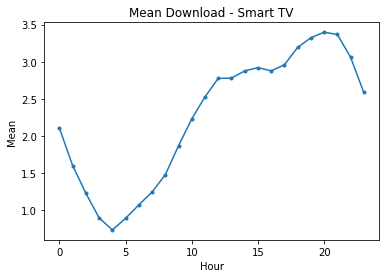

In [68]:
hour_mean_download(df_smart_tv3, "Smart TV")

####Variance

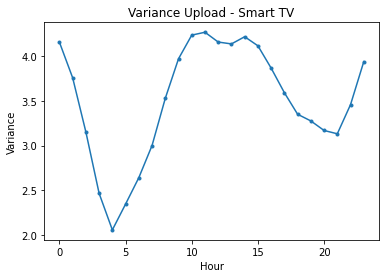

In [69]:
hour_variance_upload(df_smart_tv3, "Smart TV")

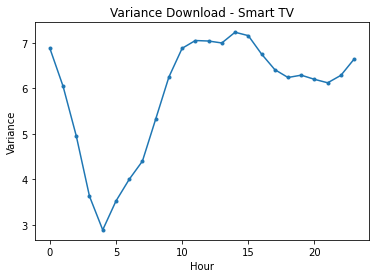

In [70]:
hour_variance_download(df_smart_tv3, "Smart TV")

####Standard Deviation

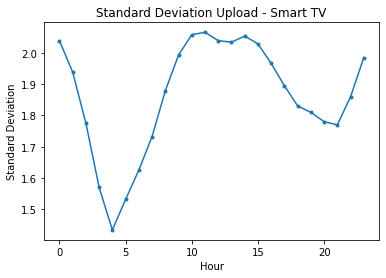

In [71]:
hour_standardDeviation_upload(df_smart_tv3, "Smart TV")

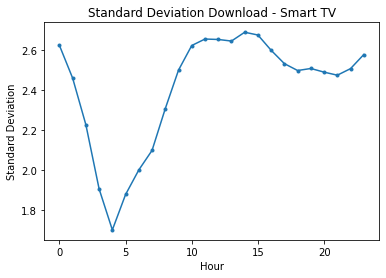

In [72]:
hour_standardDeviation_download(df_smart_tv3, "Smart TV")

#4 - Characterizing hours with most traffic

##Functions

###Step 1 - Filter dataset

####Get hours with most traffic (higher median and mean)

In [73]:
def hour_mostTraffic(df, updown, median_mean):
  if median_mean == 'median':
    return df.groupby('hour')[updown].median().idxmax()
  elif median_mean == 'mean':
    return df.groupby('hour')[updown].mean().idxmax()

####Filter Dataframe by hour with most traffic

In [74]:
def filterDataframe_mostTraffic(df, hour_mostTraffic):
  df_result = df[(df['hour'] == hour_mostTraffic)]
  return df_result

###Step 2 - Histogram

In [75]:
#Already done in function: histogram_upload(df, dataSetName)

###Steps 3 and 4 - MLE

In [76]:
def mle_mostTraffic(df, updown, dataSetName):
  fig = plt.figure(figsize=(10,5))
  plt.hist(
      df[updown],
      bins=calculate_binSize(df[updown]),
      color="blue",
      alpha=0.5,
      edgecolor="black",
      density=True,
  )

  x = np.linspace(df[updown].min(), df[updown].max(), len(df[updown]))

  shape, loc, scale = stats.gamma.fit(df[updown])
  gamma_distribution = stats.gamma.pdf(x, shape, loc, scale)

  mean, std = stats.norm.fit(df[updown])
  gaussian_distribution = stats.norm.pdf(x, mean, std)

  plt.plot(x, gamma_distribution, label="Gamma", color="green")
  plt.plot(x, gaussian_distribution, label="Gaussian", color="orange")

  plt.xlabel("Bytes")
  plt.ylabel("Frequency")
  if updown[-2:] == "up":
    updownTitle = "Upload"
  else:
    updownTitle = "Download"
  plt.title(f"MLE {updownTitle} - {dataSetName}")

  plt.legend(["Gamma", "Gaussian", "Histograma"])

##Step 4 - Chromecast

In [77]:
df_chromecast4 = df_chromecast_copy.copy()
createHourColumn(df_chromecast4)

###Dataset 5 - Chromecast Upload Median

In [78]:
#Dataset 5: Horário com a maior mediana da taxa de upload em uma hora, Chromecast
hour5 = hour_mostTraffic(df_chromecast4, "log_bytes_up", 'median')

In [79]:
df5 = filterDataframe_mostTraffic(df_chromecast4, hour5)

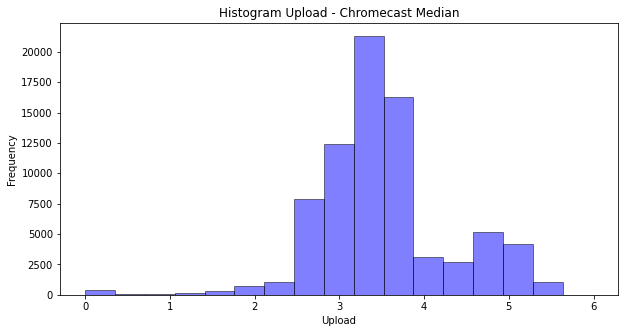

In [80]:
histogram_upload(df5, "Chromecast Median")

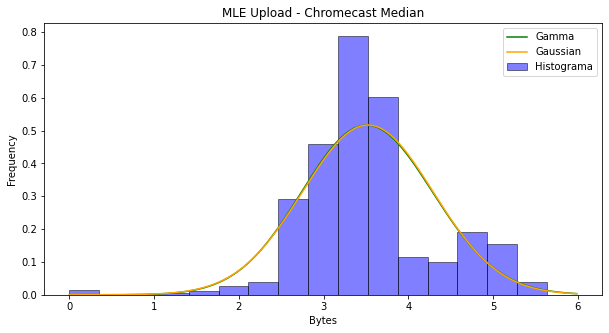

In [81]:
mle_mostTraffic(df5, "log_bytes_up", "Chromecast Median")

###Dataset 6 - Chromecast Upload Mean

In [82]:
#Dataset 6: Horario com a maior media da taxa de upload em uma hora, Chromecast
hour6 = hour_mostTraffic(df_chromecast4, "log_bytes_up", 'mean')

In [83]:
df6 = filterDataframe_mostTraffic(df_chromecast4, hour6)

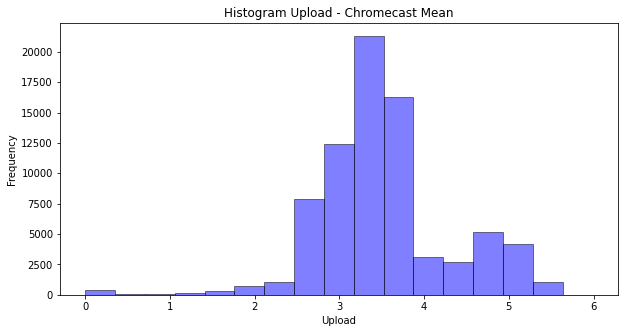

In [84]:
histogram_upload(df6, "Chromecast Mean")

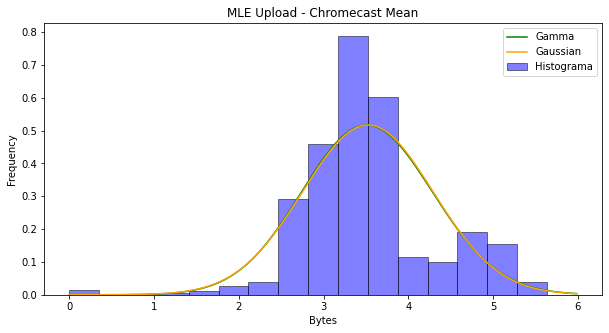

In [85]:
mle_mostTraffic(df6, "log_bytes_up", "Chromecast Mean")

###Dataset 7 - Chromecast Download Median

In [86]:
#Dataset 7: Horario com a maior mediana da taxa de download em uma hora, Chromecast
hour7 = hour_mostTraffic(df_chromecast4, "log_bytes_down", 'median')

In [87]:
df7 = filterDataframe_mostTraffic(df_chromecast4, hour7)

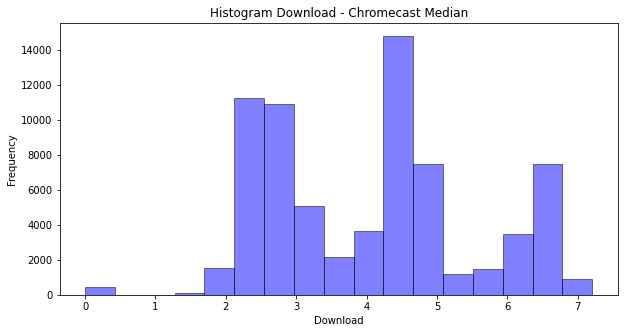

In [88]:
histogram_download(df7, "Chromecast Median")

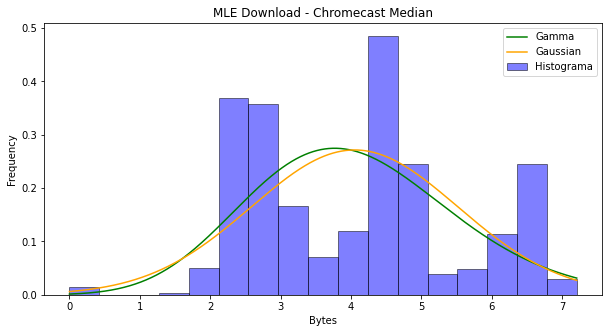

In [89]:
mle_mostTraffic(df7, "log_bytes_down", "Chromecast Median")

###Dataset 8 - Chromecast Download Mean

In [90]:
#Dataset 8: Hor ́ario com a maior m ́edia da taxa de download em uma hora, Chromecast
hour8 = hour_mostTraffic(df_chromecast4, "log_bytes_down", 'mean')

In [91]:
df8 = filterDataframe_mostTraffic(df_chromecast4, hour8)

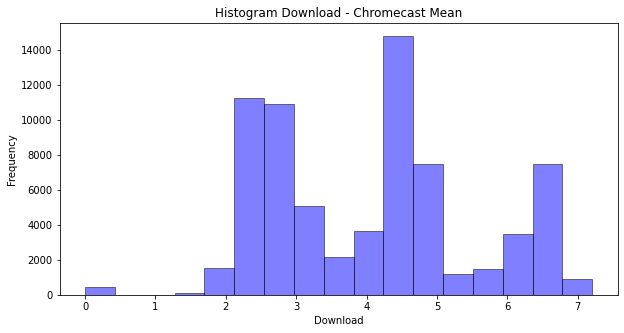

In [92]:
histogram_download(df8, "Chromecast Mean")

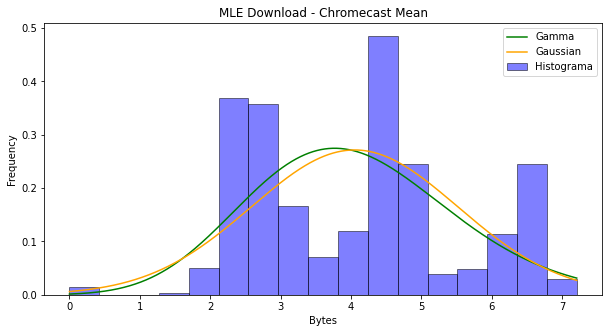

In [93]:
mle_mostTraffic(df8, "log_bytes_down", "Chromecast Mean")

##Step 4 - Smart TV

In [94]:
df_smart_tv4 = df_smart_tv_copy.copy()
createHourColumn(df_smart_tv4)

###Dataset 1 - Smart TV Upload Median

In [95]:
#Dataset 1: Horário com a maior mediana da taxa de upload em uma hora, Smart TV
hour1 = hour_mostTraffic(df_smart_tv4, "log_bytes_up", 'median')

In [96]:
df1 = filterDataframe_mostTraffic(df_smart_tv4, hour1)

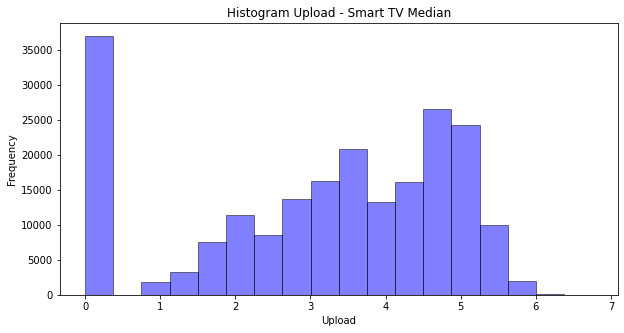

In [97]:
histogram_upload(df1, "Smart TV Median")

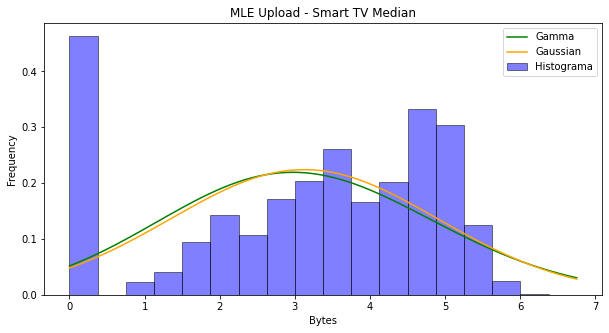

In [98]:
mle_mostTraffic(df1, "log_bytes_up", "Smart TV Median")

###Dataset 2 - Smart TV Upload Mean

In [99]:
#Dataset 2: Horario com a maior media da taxa de upload em uma hora, Smart TV
hour2 = hour_mostTraffic(df_smart_tv4, "log_bytes_up", 'mean')

In [100]:
df2 = filterDataframe_mostTraffic(df_smart_tv4, hour2)

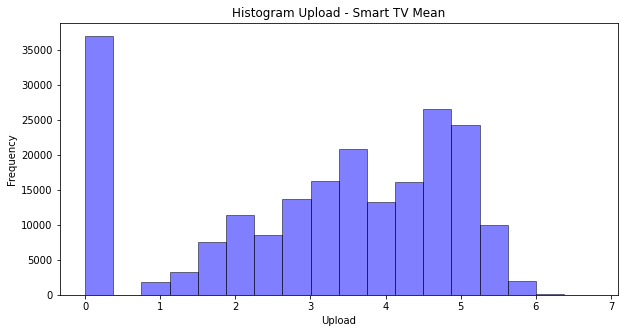

In [101]:
histogram_upload(df2, "Smart TV Mean")

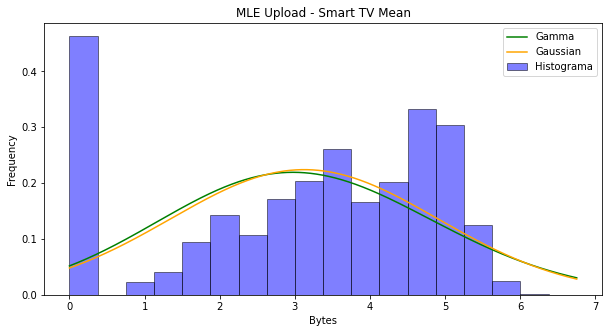

In [102]:
mle_mostTraffic(df2, "log_bytes_up", "Smart TV Mean")

###Dataset 3 - Smart TV Download Median

In [103]:
#Dataset 3: Horario com a maior mediana da taxa de download em uma hora, Smart TV
hour3 = hour_mostTraffic(df_smart_tv4, "log_bytes_down", 'median')

In [104]:
df3 = filterDataframe_mostTraffic(df_smart_tv4, hour3)

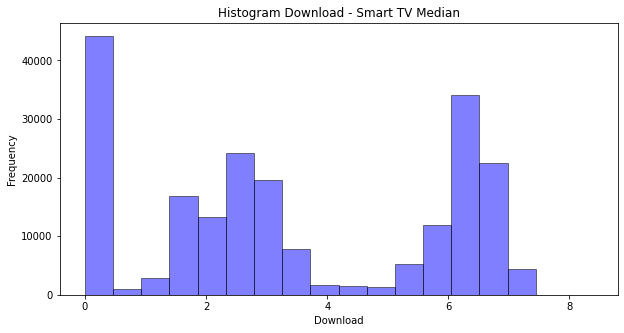

In [105]:
histogram_download(df3, "Smart TV Median")

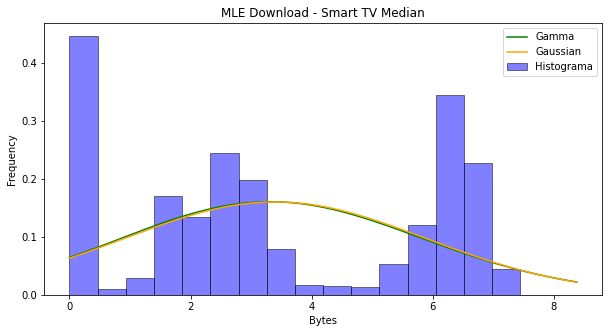

In [106]:
mle_mostTraffic(df3, "log_bytes_down", "Smart TV Median")

###Dataset 4 - Smart TV Download Mean

In [107]:
#Dataset 4: Hor ́ario com a maior m ́edia da taxa de download em uma hora, Smart TV
hour4 = hour_mostTraffic(df_smart_tv4, "log_bytes_down", 'mean')

In [108]:
df4 = filterDataframe_mostTraffic(df_smart_tv4, hour4)

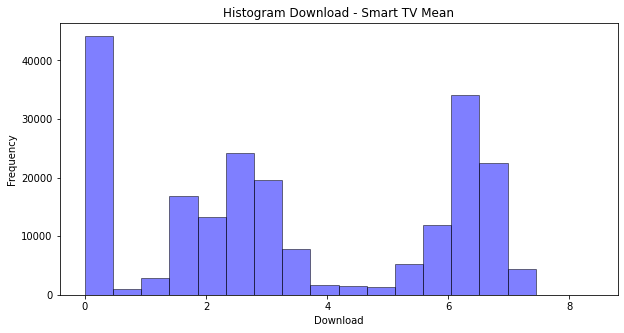

In [109]:
histogram_download(df4, "Smart TV Mean")

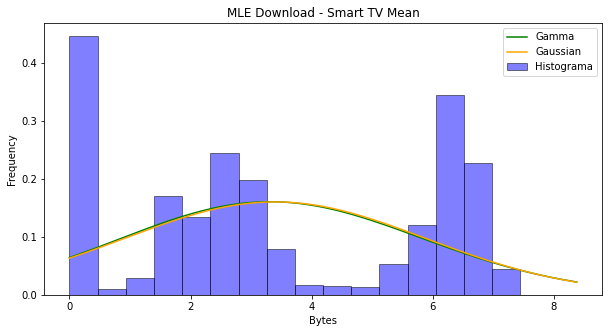

In [110]:
mle_mostTraffic(df4, "log_bytes_down", "Smart TV Mean")

##Gamma and Gaussian

In [176]:
#Gamma
shape_df1, loc_df1, scale_df1 = stats.gamma.fit(df1["log_bytes_up"])
print(f'df1: Shape = {shape_df1} | Loc = {loc_df1} | Scale = {scale_df1}')
shape_df2, loc_df2, scale_df2 = stats.gamma.fit(df2["log_bytes_up"])
print(f'df2: Shape = {shape_df2} | Loc = {loc_df2} | Scale = {scale_df2}')

shape_df3, loc_df3, scale_df3 = stats.gamma.fit(df3["log_bytes_down"])
print(f'df3: Shape = {shape_df3} | Loc = {loc_df3} | Scale = {scale_df3}')
shape_df4, loc_df4, scale_df4 = stats.gamma.fit(df4["log_bytes_down"])
print(f'df4: Shape = {shape_df4} | Loc = {loc_df4} | Scale = {scale_df4}')

shape_df5, loc_df5, scale_df5 = stats.gamma.fit(df5["log_bytes_up"])
print(f'df5: Shape = {shape_df5} | Loc = {loc_df5} | Scale = {scale_df5}')
shape_df6, loc_df6, scale_df6 = stats.gamma.fit(df6["log_bytes_up"])
print(f'df6: Shape = {shape_df6} | Loc = {loc_df6} | Scale = {scale_df6}')

shape_df7, loc_df7, scale_df7 = stats.gamma.fit(df7["log_bytes_down"])
print(f'df7: Shape = {shape_df7} | Loc = {loc_df7} | Scale = {scale_df7}')
shape_df8, loc_df8, scale_df8 = stats.gamma.fit(df8["log_bytes_down"])
print(f'df8: Shape = {shape_df8} | Loc = {loc_df8} | Scale = {scale_df8}')

df1: Shape = 220.48073768362616 | Loc = -23.96174486447611 | Scale = 0.12272309565740211
df2: Shape = 220.48073768362616 | Loc = -23.96174486447611 | Scale = 0.12272309565740211
df3: Shape = 896.5469322463027 | Loc = -71.06216506397283 | Scale = 0.08304989773768084
df4: Shape = 896.5469322463027 | Loc = -71.06216506397283 | Scale = 0.08304989773768084
df5: Shape = 3148.881521123096 | Loc = -39.808982624042514 | Scale = 0.013760617086978861
df6: Shape = 3148.881521123096 | Loc = -39.808982624042514 | Scale = 0.013760617086978861
df7: Shape = 27.130143662659037 | Loc = -3.6313681850617665 | Scale = 0.2832298335465073
df8: Shape = 27.130143662659037 | Loc = -3.6313681850617665 | Scale = 0.2832298335465073


In [175]:
#Gaussian
mean_df1 = df1['log_bytes_up'].mean()
std_df1 = df1['log_bytes_up'].std()
print(f'df1: Média = {mean_df1} | Desvio Padrão = {std_df1}')

mean_df2 = df2['log_bytes_up'].mean()
std_df2 = df2['log_bytes_up'].std()
print(f'df2: Média = {mean_df2} | Desvio Padrão = {std_df2}')

mean_df3 = df3['log_bytes_down'].mean()
std_df3 = df3['log_bytes_down'].std()
print(f'df3: Média = {mean_df3} | Desvio Padrão = {std_df3}')

mean_df4 = df4['log_bytes_down'].mean()
std_df4 = df4['log_bytes_down'].std()
print(f'df4: Média = {mean_df4} | Desvio Padrão = {std_df4}')

mean_df5 = df5['log_bytes_up'].mean()
std_df5 = df5['log_bytes_up'].std()
print(f'df5: Média = {mean_df5} | Desvio Padrão = {std_df5}')

mean_df6 = df6['log_bytes_up'].mean()
std_df6 = df6['log_bytes_up'].std()
print(f'df6: Média = {mean_df6} | Desvio Padrão = {std_df6}')

mean_df7 = df7['log_bytes_down'].mean()
std_df7 = df7['log_bytes_down'].std()
print(f'df7: Média = {mean_df7} | Desvio Padrão = {std_df7}')

mean_df8 = df8['log_bytes_down'].mean()
std_df8 = df8['log_bytes_down'].std()
print(f'df8: Média = {mean_df8} | Desvio Padrão = {std_df8}')

df1: Média = 3.124258107506722 | Desvio Padrão = 1.7800995973531673
df2: Média = 3.124258107506722 | Desvio Padrão = 1.7800995973531673
df3: Média = 3.3960945564366285 | Desvio Padrão = 2.4902555259728576
df4: Média = 3.3960945564366285 | Desvio Padrão = 2.4902555259728576
df5: Média = 3.521546370674634 | Desvio Padrão = 0.7718286854202558
df6: Média = 3.521546370674634 | Desvio Padrão = 0.7718286854202558
df7: Média = 4.052698112658847 | Desvio Padrão = 1.4694860227345465
df8: Média = 4.052698112658847 | Desvio Padrão = 1.4694860227345465


#Step 5 - Chromecast

In [111]:
def probabilityPlot(df, updown, dataSetTitle):
  fig, axes = plt.subplots(1, 2, figsize=(20, 5))

  fig.suptitle(dataSetTitle)

  x = df[updown]
  shape, loc, scale = stats.gamma.fit(df[updown])
  stats.probplot(
      x,
      dist=stats.gamma,
      sparams=(shape, loc, scale),
      plot=axes[0],
  )
  stats.probplot(
      x,
      dist=stats.norm,
      sparams=(df[updown].mean(), df[updown].std()),
      plot=axes[1],
  )

  axes[0].set_title(f"Gamma")
  axes[1].set_title(f"Gaussian")

  plt.show()

###Dataset 5 - Chromecast Upload Median

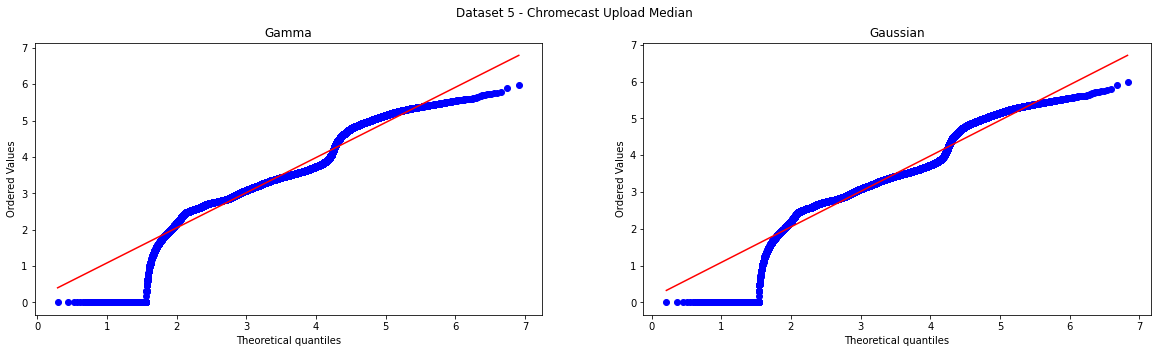

In [112]:
probabilityPlot(df5, 'log_bytes_up', 'Dataset 5 - Chromecast Upload Median')

###Dataset 6 - Chromecast Upload Mean

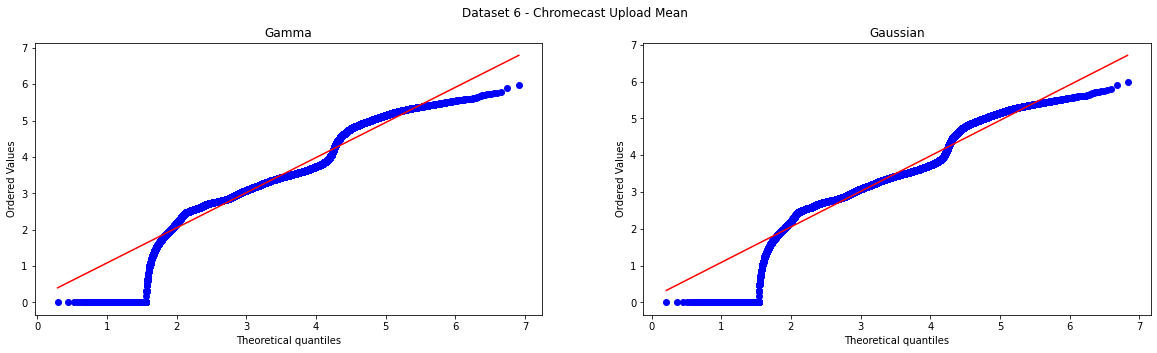

In [113]:
probabilityPlot(df6, 'log_bytes_up', 'Dataset 6 - Chromecast Upload Mean')

###Dataset 7 - Chromecast Download Median

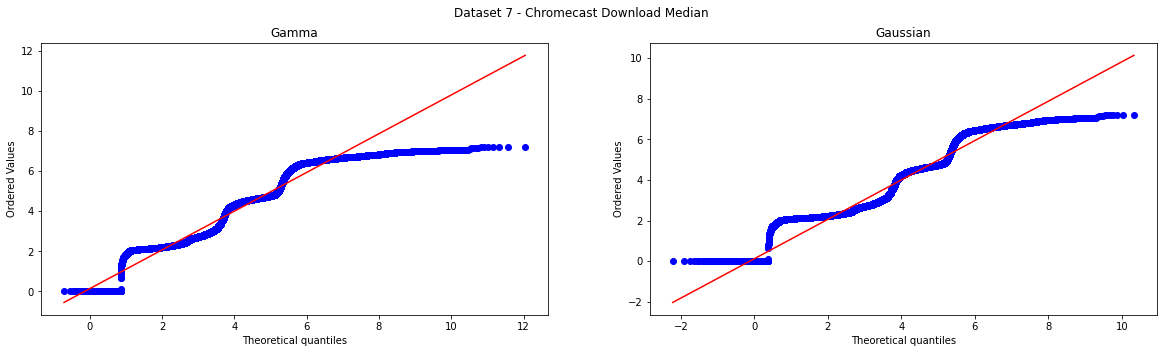

In [114]:
probabilityPlot(df7, 'log_bytes_down', 'Dataset 7 - Chromecast Download Median')

###Dataset 8 - Chromecast Download Mean

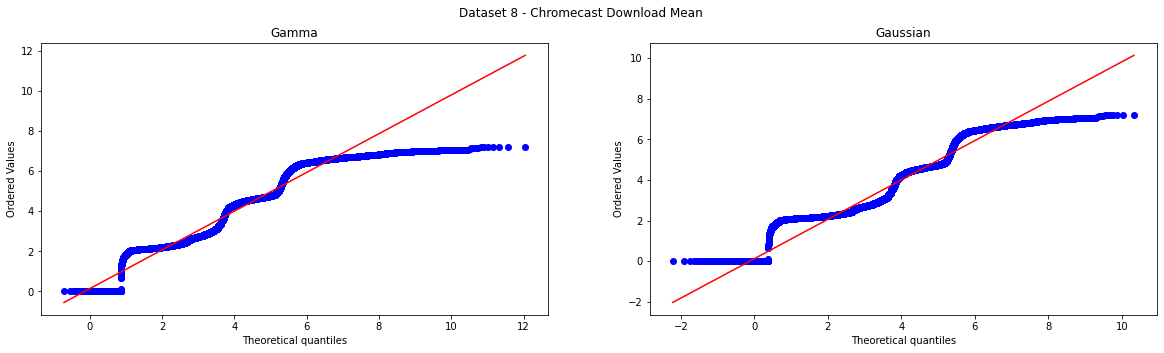

In [115]:
probabilityPlot(df8, 'log_bytes_down', 'Dataset 8 - Chromecast Download Mean')

#Step 5 - Smart TV

###Dataset 1 - Smart TV Upload Median

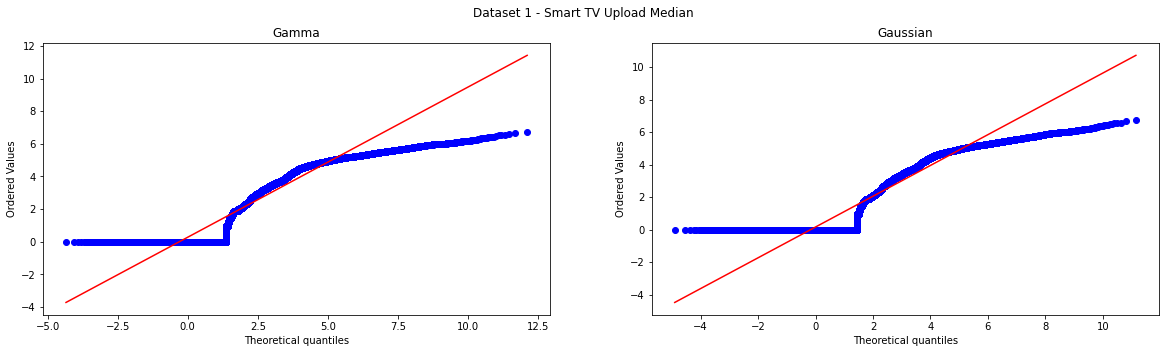

In [116]:
probabilityPlot(df1, 'log_bytes_up', 'Dataset 1 - Smart TV Upload Median')

###Dataset 2 - Smart TV Upload Mean

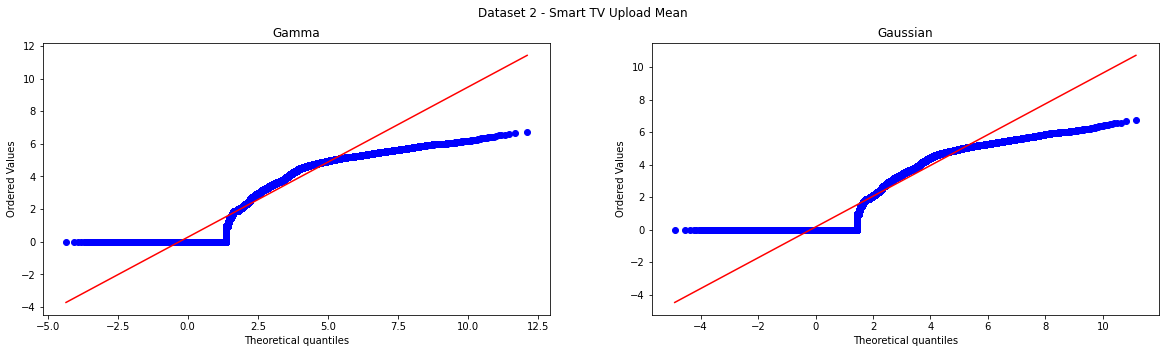

In [117]:
probabilityPlot(df2, 'log_bytes_up', 'Dataset 2 - Smart TV Upload Mean')

###Dataset 3 - Smart TV Download Median

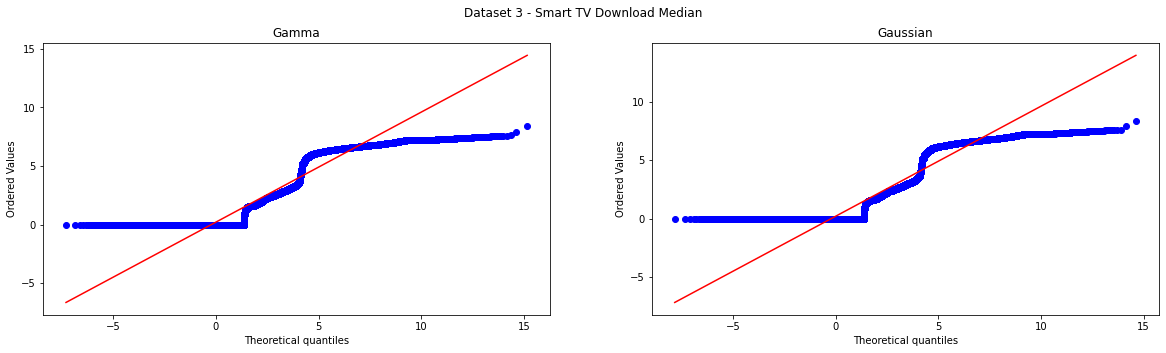

In [118]:
probabilityPlot(df3, 'log_bytes_down', 'Dataset 3 - Smart TV Download Median')

###Dataset 4 - Smart TV Download Mean

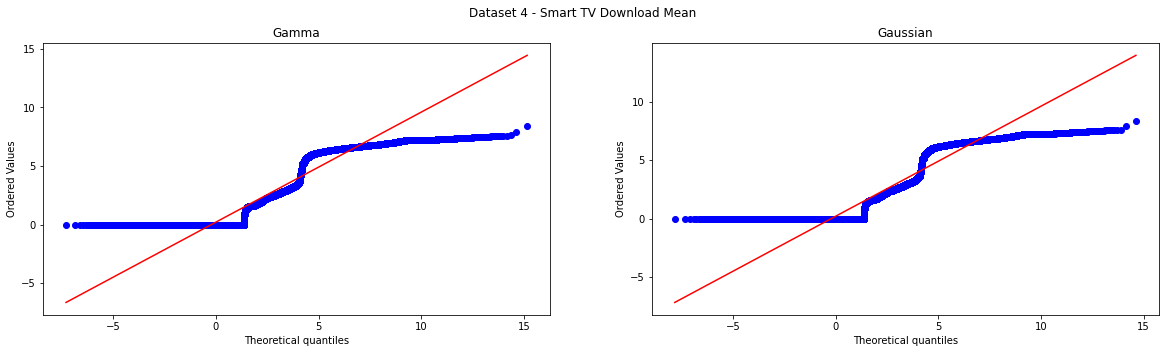

In [119]:
probabilityPlot(df4, 'log_bytes_down', 'Dataset 4 - Smart TV Download Mean')

##Hours with most traffic

In [164]:
print(f'Hora Dataset 1: {hour1}')
print(f'Hora Dataset 2: {hour2}')
print(f'Hora Dataset 3: {hour3}')
print(f'Hora Dataset 4: {hour4}')
print(f'Hora Dataset 5: {hour5}')
print(f'Hora Dataset 6: {hour6}')
print(f'Hora Dataset 7: {hour7}')
print(f'Hora Dataset 8: {hour8}')

Hora Dataset 1: 20
Hora Dataset 2: 20
Hora Dataset 3: 20
Hora Dataset 4: 20
Hora Dataset 5: 22
Hora Dataset 6: 22
Hora Dataset 7: 23
Hora Dataset 8: 23


#5 - Correlation analysis between upload and download taxes

##Functions

###Sample Correlation Coefficient

In [120]:
def correlationAnalysis(df_a, num_df_a, hour_a, df_b, num_df_b, hour_b):
  if hour_a != hour_b:
    if int(num_df_a) < 5:
      df_new = df_smart_tv4.copy()
    else:
      df_new = df_chromecast4.copy()
    df_a = filterDataframe_mostTraffic(df_new, hour_b)

  correlationCoefficient = stats.pearsonr(df_a["log_bytes_up"], df_b["log_bytes_down"])
  print(f'Correlation Coefficient = {correlationCoefficient[0]}')

  plt.figure(figsize=(9,5))  
  plt.scatter(df_a["log_bytes_up"], df_b["log_bytes_down"])
  
  plt.xlabel('Upload')
  plt.ylabel('Download')
  plt.title(f"Datasets {num_df_a} and {num_df_b} - Scatter Plot")
  
  plt.show()

##Correlation - Datasets 1 and 3

###Sample Correlation Coefficient and Scatter Plot

Correlation Coefficient = 0.9156089964784122


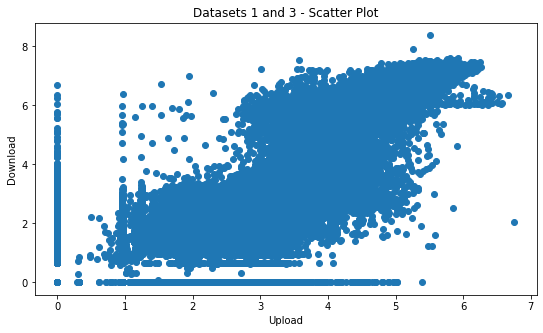

In [121]:
correlationAnalysis(df1, '1', hour1, df3, '3', hour3)

##Correlation - Datasets 2 and 4

###Sample Correlation Coefficient and Scatter Plot

Correlation Coefficient = 0.9156089964784122


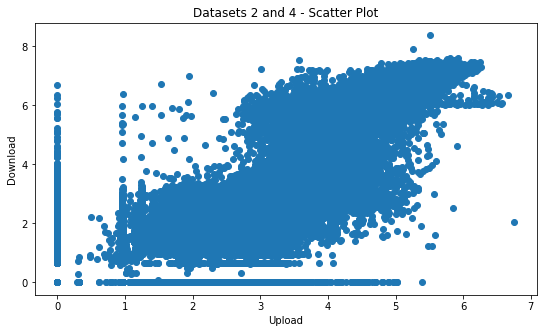

In [122]:
correlationAnalysis(df2, '2', hour2, df4, '4', hour4)

##Correlation - Datasets 5 and 7

###Sample Correlation Coefficient and Scatter Plot

Correlation Coefficient = 0.7925043015217004


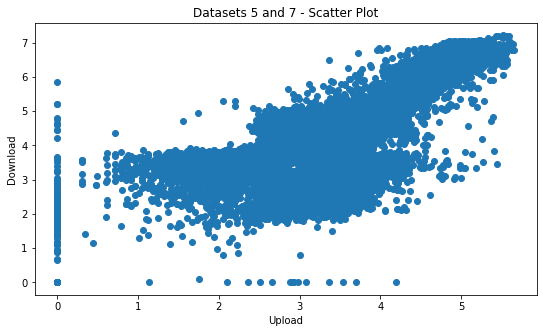

In [123]:
correlationAnalysis(df5, '5', hour5, df7, '7', hour7)

##Correlation - Datasets 6 and 8

###Sample Correlation Coefficient and Scatter Plot

Correlation Coefficient = 0.7925043015217004


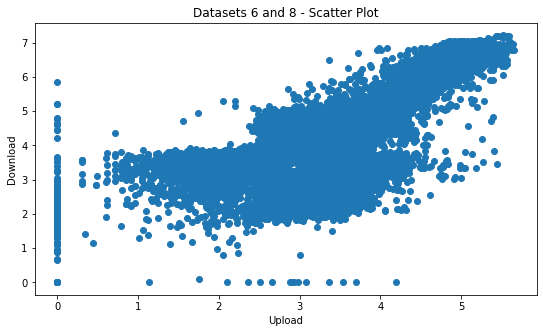

In [124]:
correlationAnalysis(df6, '6', hour6, df8, '8', hour8)

#Chromecast and Smart TV data comparison

##Functions

In [125]:
def sup_main(df_a, df_b, updown):
  
  bins = []
  bins.append(df_b[updown].min())
  num_bins = calculate_binSize(df_b[updown])
  spread = (df_b[updown].max() - df_b[updown].min())/num_bins

  for i in range(1, num_bins):
      bins.append(bins[-1] + spread)


  bin_labels = []
  for i in range(len(bins) -1):
    bin_labels.append(str(bins[i]) + ' - ' + str(bins[i + 1]))

  df_a['bins_' + updown] = pd.cut(df_a[updown], bins = bins, labels = bin_labels, include_lowest = True, right=True)

  df_b['bins_' + updown] = pd.cut(df_b[updown], bins = bins, labels = bin_labels, include_lowest = True, right=True)

  return df_a, df_b

In [126]:
def g_test(df_a, num_df_a, df_b, num_df_b, updown):

  sup_main(df_a,df_b, updown)

  df_a_obs = df_a['bins_' + updown].value_counts().sort_index()
  df_b_obs = df_b['bins_' + updown].value_counts().sort_index()

  df_a_obs = df_a_obs / df_a_obs.sum()
  df_b_obs = df_b_obs / df_b_obs.sum()

  g, p = stats.power_divergence(df_a_obs, df_b_obs, lambda_='log-likelihood')

  print(f'Comparison - Datasets {num_df_a} and {num_df_b}:')
  print(f'G_test = {g}')
  print(f'P_value = {p}')

#Comparison - Datasets 1 and 5

In [127]:
g_test(df1, '1', df5, '5', 'log_bytes_up')

Comparison - Datasets 1 and 5:
G_test = 1.705620571584578
P_value = 0.9999897858789901


#Comparison - Datasets 2 and 6

In [128]:
g_test(df2, '2', df6, '6', 'log_bytes_up')

Comparison - Datasets 2 and 6:
G_test = 1.705620571584578
P_value = 0.9999897858789901


#Comparison - Datasets 3 and 7

In [129]:
g_test(df3, '3', df7, '7', 'log_bytes_down')

Comparison - Datasets 3 and 7:
G_test = 2.4187217934803282
P_value = 0.9998971436246753


#Comparison - Datasets 4 and 8

In [130]:
g_test(df4, '4', df8, '8', 'log_bytes_down')

Comparison - Datasets 4 and 8:
G_test = 2.4187217934803282
P_value = 0.9998971436246753
